# Lectura de archivos
* Se importan las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Se importan la base de datos bfi.csv y asígnela a un objeto df.
* Se solicitan las primeras 5 observaciones con head.

In [9]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(16, 9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [10]:
# Importar la base de datos
df = pd.read_csv('bfi.csv')

# Mostrar las primeras 5 observaciones
print(df.head())

   Unnamed: 0   A1   A2   A3   A4   A5   C1   C2   C3   C4  ...   N4   N5  \
0       61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  ...  2.0  3.0   
1       61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  ...  5.0  5.0   
2       61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  ...  2.0  3.0   
3       61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  ...  4.0  1.0   
4       61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  ...  4.0  3.0   

    O1  O2   O3   O4   O5  gender  education  age  
0  3.0   6  3.0  4.0  3.0       1        NaN   16  
1  4.0   2  4.0  3.0  3.0       2        NaN   18  
2  4.0   2  5.0  5.0  2.0       2        NaN   17  
3  3.0   3  4.0  3.0  5.0       2        NaN   17  
4  3.0   3  4.0  3.0  3.0       1        NaN   17  

[5 rows x 29 columns]


# Preprocesamiento de datos
* Se eliminan las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Se analiza el patrón de datos perdidos con missingno.
* Se genera un nuevo objeto donde almacenará la base sin valores perdidos.

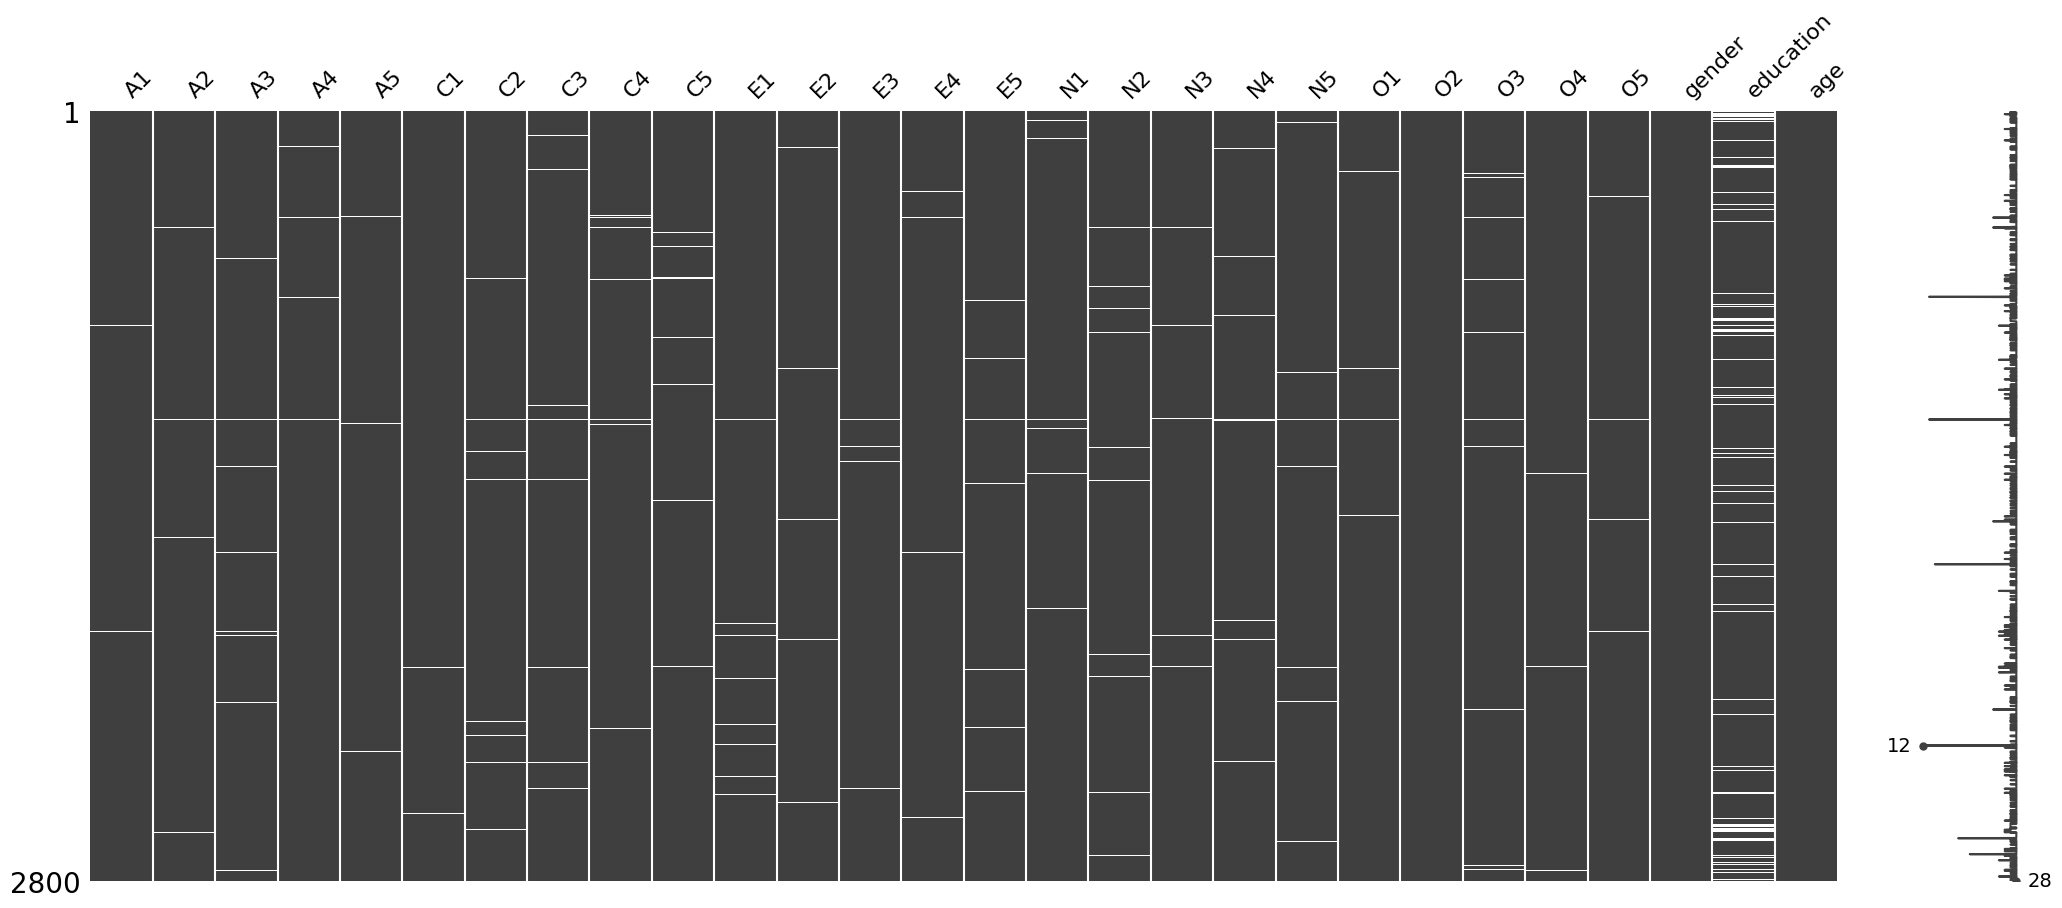

In [11]:
# Eliminar la columna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Analizar el patrón de datos perdidos
msno.matrix(df)

# Eliminar las filas con valores perdidos
df_sin_perdidos = df.dropna()

# Descripción
* Se separa en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.


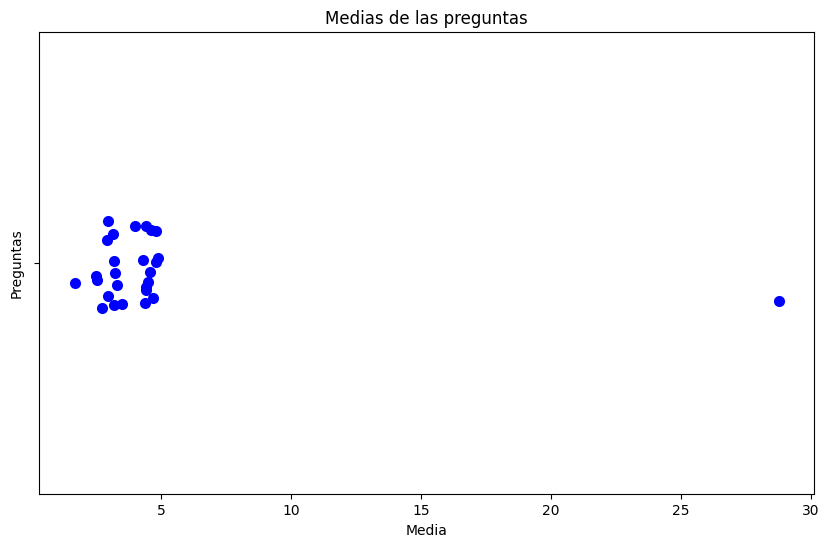

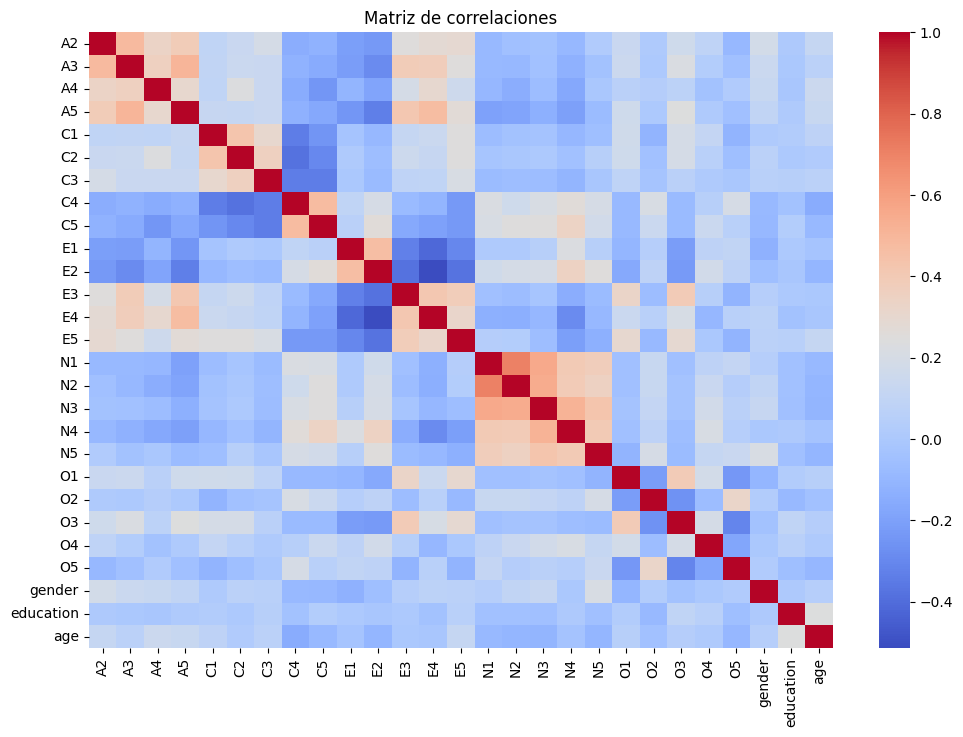

In [25]:
# Separar la batería de preguntas
bateria_preguntas = df.iloc[:, 1:]

# Calcular las medias de las preguntas
medias_preguntas = bateria_preguntas.mean()

# Visualizar las medias en un dotplot
plt.figure(figsize=(10, 6))
sns.stripplot(data=medias_preguntas, orient='h', color='blue', size=8)
plt.title('Medias de las preguntas')
plt.xlabel('Media')
plt.ylabel('Preguntas')
plt.show()

# Generar la matriz de correlaciones
matriz_correlaciones = bateria_preguntas.corr()

# Visualizar la matriz de correlaciones en un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Matriz de correlaciones')
plt.show()


# Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [26]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Prueba de esfericidad de Barlett
_, p_value_bartlett = calculate_bartlett_sphericity(bateria_preguntas)
print('Prueba de esfericidad de Barlett:')
print('p-value:', p_value_bartlett)

# Prueba de Kaiser-Meyer-Olkin
_, kmo_value = calculate_kmo(bateria_preguntas)
print('Prueba de Kaiser-Meyer-Olkin:')
print('KMO:', kmo_value)

# Instanciar el objeto FactorAnalyzer
factor_analyzer = FactorAnalyzer(n_factors=10, rotation=None, max_iter=1000)

# Ajustar el modelo a los datos
factor_analyzer.fit(bateria_preguntas)

# Scree plot
factor_analyzer.scree_plot(show=True)

# Refactorizar el objeto con las dimensiones válidas
factor_analyzer.extract_num_factors()

# Extraer las cargas λ del modelo
cargas_lambda = factor_analyzer.loadings_

# Mostrar las cargas λ
print('Cargas λ:')
print(cargas_lambda)



Prueba de esfericidad de Barlett:
p-value: nan


c:\Users\javit\Envs\MDD\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


LinAlgError: SVD did not converge

# Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

![](img.png)